### Set up environment

In [1]:
import lateral_signaling as lsig
import numpy as np
import pandas as pd
from tqdm import tqdm
import numba

import scipy.integrate as sint
from scipy.spatial import Voronoi
from scipy.sparse import csr_matrix

import holoviews as hv
import colorcet as cc
hv.extension("matplotlib")

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [2]:
import os

# Set directory
dir_name = "plots"

In [3]:
%load_ext blackcellmagic

__Define RHS function(s)__

In [4]:
def tc_rhs_beta_g_normA(S, S_delay, Adj, sender_idx, beta_func, beta_args, alpha, k, p, delta, lambda_, g, rho):
    """
    Right-hand side of the transciever circuit delay 
    differential equation. Uses a matrix of cell-cell contact 
    lengths `L`.
    """

    # Get signaling as a function of density
    beta = beta_func(rho, *beta_args)
    
    # Get input signal across each interface
    S_bar = beta * (Adj @ S_delay)

    # Calculate dE/dt
    dS_dt = (
        lambda_
        + alpha
        * (S_bar ** p)
        / (
            ((g ** 2) * k) ** p 
            + (delta * S_delay) ** p 
            + S_bar ** p
        )
        - g * S
    )

    # Set sender cell to zero
    dS_dt[sender_idx] = 0

    return dS_dt

In [5]:
def tc_rhs_beta_g_normA_inhib(S, S_delay, Adj, sender_idx, beta_func, beta_args, I, alpha, k, p, delta, lambda_, g, rho):
    """
    Right-hand side of the transciever circuit delay 
    differential equation. Uses a matrix of cell-cell contact 
    lengths `L`.
    """

    # Get signaling as a function of density
    beta = beta_func(rho, *beta_args)
    
    # Get input signal across each interface
    S_bar = beta * (Adj @ S_delay)

    # Calculate dE/dt
    dS_dt = (
        lambda_
        + alpha
        * (S_bar ** p)
        / (
            ((g ** 2) * k) ** p 
            + (delta * (S_delay + I)) ** p 
            + S_bar ** p
        )
        - g * S
    )

    # Set sender cell to zero
    dS_dt[sender_idx] = 0

    return dS_dt

<hr>

## Generate all figures for a trial set of parameters 

In [56]:
# Set  name of trial
trial_name = "highcis_expbeta"

# Random seed
seed = 2021

__Set growth min and max__

In [57]:
# Set min and max density
rho_min, rho_max = 1, 4

__Set RHS of dynamical equation__

In [58]:
# Set the RHS function in long-form
rhs_long = tc_rhs_beta_g_normA
rhs_long_inhib = tc_rhs_beta_g_normA_inhib

# Set beta(rho)
beta_func = lsig.beta_rho_exp
beta_args = (1.,)   # parameter `m` for beta(rho)

__Set parameters for DDE integration__

In [60]:
# Set DDE parameters
alpha = 3
k = 0.02
p = 2
delta = 3
lambda_ = 1e-3
g = 1

# Set delay
delay = 0.3

# Package params
param_names = ["alpha", "k", "p", "delta", "lambda_", "g"]
param_vals = alpha, k, p, delta, lambda_, g

# Package arguments for lsig.integrate_DDE and 
#   lsig.integrate_DDE_varargs. Density param is 
#   initialized with rho_min.
dde_args = *param_vals, rho_min

__Set max interaction radius__

In [61]:
# cell-cell distance (dimensionless)
r = 1.   

# maximum interaction radius in cell-lengths 
irad = 3 * r + 0.05

<hr>

## Save parameters

In [62]:
params_df = pd.DataFrame({
    "trial_name": trial_name,
    "parameter":  param_names + ["beta_param_" + str(i) for i, _ in enumerate(beta_args)] + ["delay"],
    "value":      list(param_vals)  + list(beta_args) + [delay],
})

params_df

trial_name     parameter  value
0  highcis_expbeta         alpha  3.000
1  highcis_expbeta             k  0.020
2  highcis_expbeta             p  2.000
3  highcis_expbeta         delta  3.000
4  highcis_expbeta       lambda_  0.001
5  highcis_expbeta             g  1.000
6  highcis_expbeta  beta_param_0  1.000
7  highcis_expbeta         delay  0.300

In [63]:
params_df.to_csv(trial_name + "_params.csv", index=False)

<hr>

### Maximum activation area vs. initial density

__Set figure parameters__

In [74]:
# Set which figures to save
save_plot = True
save_vid = True

# Set # samples of initial density (rho0)
n_rho = 7

# Select runs to save
runs = (0, 2)

__Set time parameters__

In [75]:
# Set time parameters
tmax = 5
nt_t = 100
nt = int(nt_t * tmax) + 1
t = np.linspace(0, tmax, nt)

__Construct lattice of cells__

In [76]:
# Make square lattice
rows = cols = 44
X = lsig.hex_grid(rows, cols, r=r)

# Get # cells
n = X.shape[0]

__Get cell adjacency__

In [77]:
# Get adjacency and normalize
# iAdj = lsig.irad_Adj(X, irad, sparse = True, row_stoch=True)
gAdj = lsig.gaussian_irad_Adj(X, irad, sparse=True, row_stoch=True)

__Set sender cell location__

In [78]:
# Set sender cell
sender_idx = lsig.get_center_cells(X)

__Get RHS of signaling DDE__

In [79]:
# Get RHS of DDE equation to pass to integrator
rhs = lsig.get_DDE_rhs(rhs_long, gAdj, sender_idx, beta_func, beta_args,)

__Run analysis for figure__

In [80]:
# Run simulation and make plot
res, plot = lsig.run_max_prop_area(
    t,
    X,
    sender_idx,
    rho_min,
    rho_max,
    n_rho,
    g,
    rhs,
    dde_args,
    delay,
    k,
    where_vars=6,
    progress_bar=True,
)

100%|██████████| 7/7 [00:01<00:00,  6.50it/s]


__Inspect individual runs__

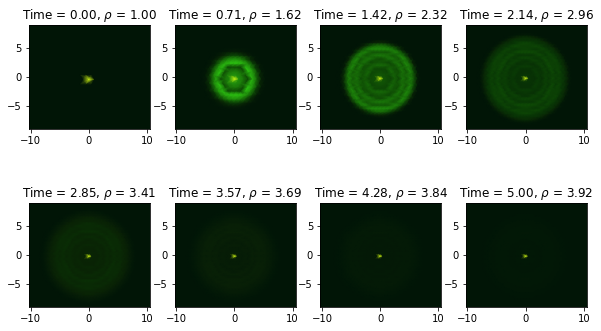

In [81]:
import matplotlib.pyplot as plt
%matplotlib inline

# Show still frames from a run
lsig.inspect_max_prop_results(
    res,
    0,
    rows,
    cols,
    vmax=1,
#     vmax="mult_k",
#     vmax_mult_k=25,
)

__Plot maximum propagation vs. density__

:Scatter   [rho_0]   (max_area)
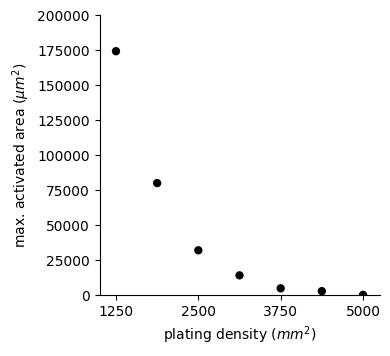

In [82]:
%%capture --no-display

plot = plot.opts(
#     title=f"delta = {delta:.1f}",
    ylim=(0, 200000),
    color="k"
)

hv.output(plot, dpi=100)

### Save plots and videos

In [83]:
%%capture --no-display

if save_plot:
    
    # Set plot filepath and format
    fmt = "png"
    plot_name = trial_name + "_dens_area_plot_irad_3_alpha_{0:.2f}_k_{1:.2e}_delta_{2:.2f}".format(
        dde_args[0], dde_args[1], dde_args[3], 
    ) + "." + fmt
    plot_path = os.path.join(dir_name, plot_name)

    hv.save(plot, plot_path, fmt=fmt, dpi=150)

Writing to: plots\highcis_expbeta_vid_irad_3_alpha_3.00_k_2.00e-02_delta_3.00_rho0_1.00


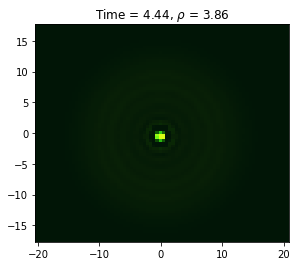

In [84]:
import matplotlib.pyplot as plt
%matplotlib inline


if save_vid:
    for run in runs[:1]:
        
        # Set video filename
        vid_name = trial_name + "_vid_irad_3_alpha_{0:.2f}_k_{1:.2e}_delta_{2:.2f}_rho0_{3:.2f}".format(
            dde_args[0], dde_args[1], dde_args[3], res["rho_0_space"][run]
        )

        # Save colormesh
        lsig.save_max_prop_video(
            res,
            run,
            rows,
            cols,
            vid_name,
            n_interp=80,
            n_frames=75,
            fps=15,
            dir_name=dir_name,
            set_xylim="fit",
            vmax="mult_k",
#             sender_idx=np.nan,
            vmax_mult_k=25,
#             which_k=1,
        )

<hr>

### Propagation over time (biphasic vs. monophasic)

:Curve   [t]   (A_t)
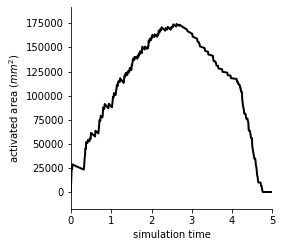

In [22]:
%%capture --no-display

data = {
    "t"   : t,
    "A_t" : res["A_rho0_t"][0],
}

plot = hv.Curve(
    data,
    kdims=["t"],
    vdims=["A_t"],
).opts(
    xlabel="simulation time",
    ylabel=r"activated area ($mm^2$)",
    color="k"
)

plot

<hr>

### Basal promoter activity phase plot (steady-state for $\alpha$ vs. $\lambda$)

__Set figure parameters__

In [23]:
# Set options for parameter sampling
log_lambda_minmax =  -6, -1    # lambda ~ [10**min, 10**max]
log_alpha_minmax   =  -1,  1    # alpha  ~ [10**min, 10**max]
n_lambda = 25 
n_alpha = 25

# nubmer of replicates
n_reps = 5

# Threshold for activation
thresh = k

__Set time parameters__

In [24]:
# Set time parameters
tmax = 5
nt_t = 100
nt = int(nt_t * tmax) + 1
t = np.linspace(0, tmax, nt)

__Construct lattice of cells__

In [25]:
# Make square lattice
rows = cols = 10
r = 1.   # cell-cell distance
X = lsig.hex_grid(rows, cols, r=r)

# Get # cells
n = X.shape[0]

__Get cell adjacency__

In [26]:
# Calculate weighted adjacency using a truncated Gaussian
gAdj = lsig.gaussian_irad_Adj(X, irad, sparse=True, row_stoch=True)

__Set sender cell location__

In [27]:
# No senders
sender_idx = np.array([], dtype=int)

__Get RHS of signaling DDE__

In [28]:
# Get RHS of DDE equation to pass to integrator
rhs = lsig.get_DDE_rhs(rhs_long, gAdj, sender_idx, beta_func, beta_args,)

In [29]:
res, plots = lsig.run_basal_activity(
    t=t,
    n=n,
    log_lambda_minmax=log_lambda_minmax,
    log_alpha_minmax=log_alpha_minmax,
    n_lambda=n_lambda,
    n_alpha=n_alpha,
    n_reps=n_reps,
    rhs=rhs,
    dde_args=dde_args,
    delay=delay,
    thresh=thresh,
    seed=seed,
    progress_bar=True,
)

100%|██████████| 3125/3125 [01:21<00:00, 38.19it/s]


:Layout
   .QuadMesh.I  :QuadMesh   [lambda,alpha]   (% cells activated)
   .Overlay.I   :Overlay
      .QuadMesh.I :QuadMesh   [lambda,alpha]   (% cells activated)
      .Text.I     :Text   [x,y]
      .Text.II    :Text   [x,y]
   .QuadMesh.II :QuadMesh   [lambda,alpha]   (mean_fluorescence)
   .Overlay.II  :Overlay
      .QuadMesh.I :QuadMesh   [lambda,alpha]   (mean_fluorescence)
      .Text.I     :Text   [x,y]
      .Text.II    :Text   [x,y]
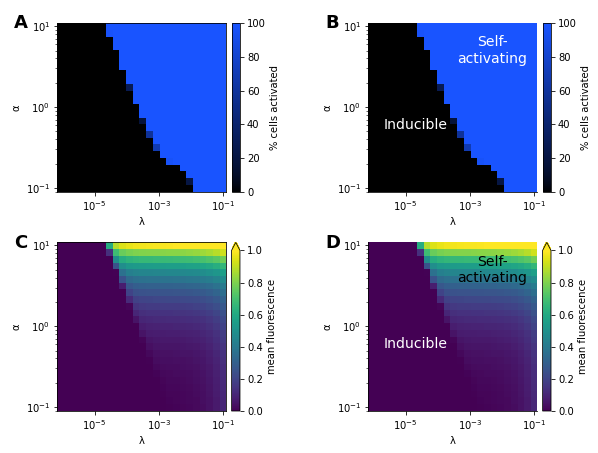

In [30]:
%%capture --no-display

hv.Layout(plots).cols(2)

<hr>

### Boundary formation with an inhibitor gradient

__Set figure parameters__

In [31]:
# Length of long axis
L = 200

# Percent sender cells
pct_s = 1

I0 = 0.25

__Set time parameters__

In [32]:
# Set time parameters
tmax = 2
nt_t = 100
nt = int(nt_t * tmax) + 1
t = np.linspace(0, tmax, nt)

__Construct lattice of cells__

In [33]:
# Make lattice and get adjacency matrix
rows, cols = int(L/4), int(L)
X = lsig.hex_grid(rows, cols, r=r)

# Shift coordinates to nonnegative
X = X - X.min(axis=0)

# Get # cells
n = X.shape[0]

__Get cell adjacency__

In [34]:
# Calculate weighted adjacency using a truncated Gaussian
gAdj = lsig.gaussian_irad_Adj(X, irad, sparse=True, row_stoch=True)

# # If there are periodic boundaries, remove them in the x-direction
gAdj[:rows, -rows:] = 0
gAdj[-rows:, :rows] = 0

C:\Users\Pranav\Anaconda3\lib\site-packages\scipy\sparse\_index.py:126: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


__Set sender cell location__

In [35]:
# Set seed
np.random.seed(seed)

# Specify percent of population that is sender
n_s = int(n * (pct_s/100)) + 1

# Assign senders randomly
sender_idx = np.random.choice(n, n_s, replace=False)

__Get RHS of signaling DDE__

In [36]:
@numba.njit
def I_x_exp(x, I0, b):
    """Inhibitor concentration (exponential gradient)"""
    return I0 * np.exp(-b * x)

In [37]:
# Get inhibitor concentration
b = 8 * np.log(2) / L
I = I_x_exp(X[:, 0], I0, b)

In [38]:
rhs_noinhib = lsig.get_DDE_rhs(rhs_long, gAdj, sender_idx, beta_func, beta_args,)
rhs_inhib   = lsig.get_DDE_rhs(rhs_long_inhib, gAdj, sender_idx, beta_func, beta_args, I)

In [39]:
# Initialize fluorescence
S0 = np.zeros(n, dtype=np.float32)
S0[sender_idx] = 1

# Calculate logistic growth
rho_t = lsig.logistic(t, g, rho_min, rho_max)

# Simulate
S_t_inhib = lsig.integrate_DDE_varargs(
    t,
    rhs_inhib,
    var_vals=rho_t,
    dde_args=dde_args,
    E0=S0,
    delay=delay,
    where_vars=6,
    progress_bar=True,
)

S_t_noinhib = lsig.integrate_DDE_varargs(
    t,
    rhs_noinhib,
    var_vals=rho_t,
    dde_args=dde_args,
    E0=S0,
    delay=delay,
    where_vars=6,
    progress_bar=True,
)

100%|██████████| 200/200 [00:00<00:00, 1285.48it/s]


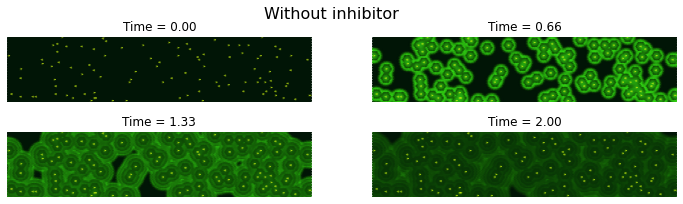

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

# Set dimensions for a grid of frames
nrows, ncols = 2, 2

# Render frames
nplot = nrows * ncols
idx = [int(i) for i in np.linspace(0, nt-1, nplot)]
fig, axs = plt.subplots(
    nrows=nrows, ncols=ncols, figsize=(6 * ncols, 1.6 * nrows)
)
for ax, i in zip(axs.flat, idx):
    title=f"Time = {t[i]:.2f}"
    lsig.inspect_colormesh(
        ax=ax,
        X=X,
        rows=rows,
        cols=cols,
        var=S_t_noinhib, 
        idx=i,
        vmin=0, 
        vmax=1, 
        cmap="kgy",
        title=title,
        axis_off=True
    )

fig.suptitle("Without inhibitor", fontsize=16);

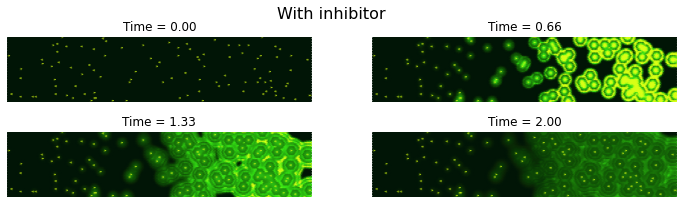

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

# Set dimensions for a grid of frames
nrows, ncols = 2, 2

# Render frames
nplot = nrows * ncols
idx = [int(i) for i in np.linspace(0, nt-1, nplot)]
fig, axs = plt.subplots(
    nrows=nrows, ncols=ncols, figsize=(6 * ncols, 1.6 * nrows)
)
for ax, i in zip(axs.flat, idx):
    title=f"Time = {t[i]:.2f}"
    lsig.inspect_colormesh(
        ax=ax,
        X=X,
        rows=rows,
        cols=cols,
        var=S_t_inhib, 
        idx=i,
        vmin=0, 
        vmax=25 * k, 
        cmap="kgy",
        title=title,
        axis_off=True
    )

fig.suptitle("With inhibitor", fontsize=16);

<hr>

### Drug effects

__Set figure parameters__

In [42]:
# Set parameters for each drug condition
drug_params = [
    #  g  rho_0  rho_max
    (1.0,     1,       4),  # drug-free
    (1.5,     1,       4),  # FGF2
    (1.0,     1,       2),  # Ri
]

pct_s = 1

kn = 2

where_g = 5

__Set time parameters__

In [43]:
# Set time parameters
tmax = 5
nt_t = 100
nt = int(nt_t * tmax) + 1
t = np.linspace(0, tmax, nt)

__Construct lattice of cells__

In [44]:
# Make lattice and get adjacency matrix
rows = cols = 150
X = lsig.hex_grid(rows, cols, r=r)

# Get # cells
n = X.shape[0]

__Get cell adjacency__

In [45]:
from scipy.sparse import csr_matrix


def kn_Adj(kn, rows, cols=0, dtype=np.float32, sparse=False, row_stoch=False, **kwargs):
    """
    Construct adjacency matrix for a periodic array of 
    nodes (cells). Adjacency is determined by calculating pairwise 
    distance and applying a threshold `irad` (interaction radius)
    """
    
    if not cols:
        cols = rows
    
    n = rows * cols
    
    # Construct adjacency matrix
    if sparse:
        A = lsig.make_Adj_sparse(rows, cols, dtype=dtype, **kwargs)
        eye = csr_matrix((np.ones(n, dtype=dtype), (np.arange(n), np.arange(n))))
        A = (A + eye) ** kn > 0
        
    else:
        A = lsig.make_Adj(rows, cols, dtype=dtype, **kwargs)
        eye = np.eye(n)
        A = numpy.linalg.matrix_power(A + eye, kn) > 0
    
    A = A - eye
    
    if row_stoch:
        rowsum = np.sum(A, axis=1)
        if sparse:
            A = csr_matrix(A / rowsum)
        else:
            rowsum = rowsum[:, np.newaxis]
            A = np.divide(A, rowsum)
    
    return A

In [46]:
# Calculate weighted adjacency using a truncated Gaussian
kAdj = kn_Adj(kn, rows, cols, sparse=True, row_stoch=True)

__Set sender cell location__

In [47]:
# Set seed
np.random.seed(seed)

# Specify percent of population that is sender
n_s = int(n * (pct_s/100)) + 1

# Assign senders randomly
sender_idx = np.random.choice(n, n_s, replace=False)

__Get RHS of signaling DDE__

In [48]:
# Get RHS of DDE equation to pass to integrator
rhs = lsig.get_DDE_rhs(rhs_long, kAdj, sender_idx, beta_func, beta_args,)

In [49]:
# Get initial conditions
S0 = np.zeros(n)
S0[sender_idx] = 1

In [50]:
args = list(dde_args)

In [51]:
# Initialize results vectors
rho_drug_t = np.empty((3, nt), dtype=np.float32)
X_drug_t = np.empty((3, nt, n, 2), dtype=np.float32)
S_drug_t = np.empty((3, nt, n), dtype=np.float32)

for i in range(3):

    # Get parameters
    g_, rho_0_, rho_max_ = drug_params[i]
    
    # Calculate density and contact length
    rho_t = lsig.logistic(t, g_, rho_0_, rho_max_)
    r_t = 1/np.sqrt(rho_t)

    # Get cell positions
    X_t = np.empty((nt, n, 2))
    X_t[:, :, 0] = np.outer(r_t, X[:, 0])
    X_t[:, :, 1] = np.outer(r_t, X[:, 1])
    
    args[where_g] = g_
#     args[1] = 0.06
    
    # Simulate
    S_t = lsig.integrate_DDE_varargs(
        t,
        rhs,
        var_vals=rho_t,
        where_vars=6,
        dde_args=args,
        E0=S0,
        delay=delay
    )
    
    # Save results
    rho_drug_t[i] = rho_t
    X_drug_t[i] = X_t
    S_drug_t[i] = S_t

In [52]:
# Calculate area of activated cells
S_act_t = S_drug_t > k
S_mean_t = S_drug_t.mean(axis=2)
S_act_num = S_act_t.sum(axis=2)
A_act_drug = np.array([lsig.A_cells_um(S_act_num[i], rho_drug_t[i]) for i in range(3)])

:Overlay
   .Curve.Drug_hyphen_minus_free :Curve   [x]   (y)
   .Curve.FGF2                   :Curve   [x]   (y)
   .Curve.Ri                     :Curve   [x]   (y)
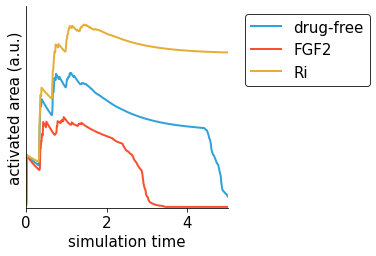

In [64]:
%%capture --no-display

p2 = hv.Overlay(
    [
        hv.Curve(
            data = (t, A_act_drug[i]),
            label = ("drug-free", "FGF2", "Ri")[i],
        ).opts(
            xlabel = r"simulation time",
            xlim = (0, None),
            ylabel = r"activated area (a.u.)",
            ylim = (0, None),
            yticks = 0,
            fontscale=1.5
        )
        for i in range(3)
    ]
).opts(
    legend_position="right"
)

p2

<hr>

### Mock: Morphogen vs. mechanics

<hr>

### Mock: Drug titration (different $g$, $\rho_\text{max}$)

<hr>

### Testing


Gaussian adjacency based on graph distance for very large numbers of cells ~ >10k (may fail due to excessive memory requirements)

Strategy:
- Construct A + eye
- Iterate from j in [2, kn], where kn = floor(irad / r)
- Each iteration, (power(A + eye)^j > 0) XOR ((power(A + eye)^(j-1) > 0) tells you where the new neighbors are
- Get the weights for all new neighbors at that graph distance using scipy.stats.norm.pdf(loc=j, scale = kn/2)

In [54]:
from scipy.sparse import csr_matrix
import scipy.stats

def gauss_kn_Adj_sparse(kn, r, rows, cols=0, dtype=np.float32, **kwargs):
    """
    Construct adjacency matrix for a periodic array of 
    nodes (cells). Adjacency is determined by calculating pairwise 
    distance and applying a threshold `irad` (interaction radius)
    """
    
    if not cols:
        cols = rows
    
    n = rows * cols
    
    # Construct adjacency matrix
    a = lsig.make_Adj_sparse(rows, cols, dtype=dtype, **kwargs)
    eye = csr_matrix((np.ones(n, dtype=dtype), (np.arange(n), np.arange(n))))
    
    if kn == 1:
        return a
    
    A = a.copy()
    A[a.nonzero()] = scipy.stats.norm.pdf(loc=1, scale = kn/2)
    
    for j in range(2, kn):
        a1 = (a + eye) ** (j-1)
        a2 = (a + eye) ** j
        nb = np.logical_xor(a2 > 0, a1 > 0).nonzero()
        w = scipy.stats.norm.pdf(loc=j, scale = kn/2)
        A[nb] = w
    
    rowsum = np.sum(A, axis=1)[:, np.newaxis]
    A = np.divide(A, rowsum)
    
    return A